#Prashanna Acharya 

Advanced Big Data and Data Mining (MSCS-634-M20)

Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python in Jupyter Notebook

Step 1: Data Collection

##Dataset Description

This Data is accumulated from Kaggle, which entails the healthcare data sets of patients in a hospital. 

In [1]:
import pandas as pd



In [2]:
df = pd.read_csv("healthcare_dataset.csv")


In [3]:
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,10/7/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,12/18/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,10/9/2022,Penicillin,Abnormal


Step 2: Data Visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


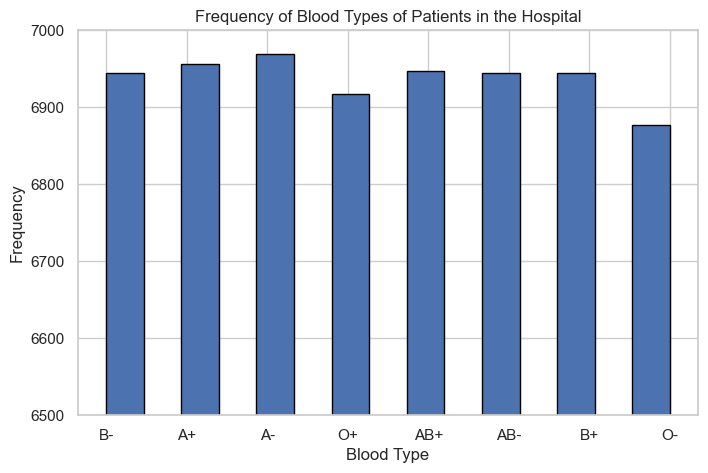

In [5]:
##So, the graph below shows the frequency of different blood types of patients in a hospital. 

plt.figure(figsize=(8, 5))
plt.hist(df["Blood Type"], bins=15, edgecolor="black")
plt.title("Frequency of Blood Types of Patients in the Hospital")
plt.xlabel("Blood Type")
plt.ylabel("Frequency")

plt.ylim(6500, 7000)

plt.show()


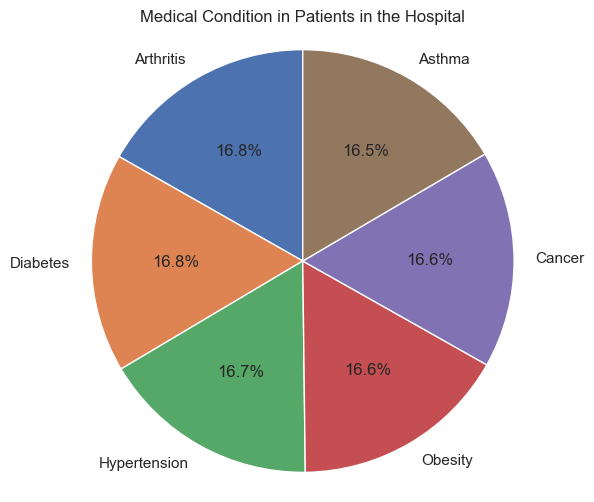

In [6]:
##So the data visualization below illustrates the % of patients suffering from various medical conditions in a hospital

category_counts = df["Medical Condition"].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Medical Condition in Patients in the Hospital")
plt.axis("equal")  # keeps the pie circular
plt.show()


Step 3: Data Preprocessing

3.1     Handling Missing Values

Goal: Detect any missing values, and fill with median

In [7]:
missing_values = df.isnull().sum()
print("Missing values before handling\n",missing_values )

Missing values before handling
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [8]:
##the following fills the missing numbers with the average value. 

df_filled = df.fillna(df.mean(numeric_only=True))

after_fill = df_filled.isnull().sum()
print("Missing values after handling\n", after_fill)

Missing values after handling
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


3.2 Outliers Detection and Removal

Goal: To identify outliers in Billing amount using IQR method, and remove them.

In [9]:
#Calculating IQR

Q1 = df_filled['Billing Amount'].quantile(0.25)
Q3 = df_filled['Billing Amount'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

#Identifying Outlier

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_filled[
    (df_filled['Billing Amount'] < lower_bound) |
    (df_filled['Billing Amount'] > upper_bound)
]

if outliers.empty:
    print("No outliers detected in the dataset.")
else:
    print(f"Outliers detected: {outliers.shape[0]} rows found.")
    display(outliers)
    
if not outliers.empty:
    df_no_outliers = df_filled[
        (df_filled['Billing Amount'] >= lower_bound) &
        (df_filled['Billing Amount'] <= upper_bound)
    ]
    print("Outliers removed.")
else:
    df_no_outliers = df_filled.copy()
    print("Dataset unchanged (no outliers).")


Q1: 13241.224652365136
Q3: 37820.508435784795
IQR: 24579.28378341966
No outliers detected in the dataset.
Dataset unchanged (no outliers).


3.3 Data Reduction 

Here, reducing dataset size by sampling and eliminating less relevant columns. 

In [10]:
# Sampling: keep 50% of data

df_sampled = df_no_outliers.sample(frac=0.5, random_state=42)
print("Original size (before Reduction):", df_no_outliers.shape)
print("Sampled size (after Reduction):", df_sampled.shape)

# Drop irrelevant column

df_reduced = df_sampled.drop(columns=['Room Number'])
print("Columns after reduction:", df_reduced.columns)

Original size (before Reduction): (55500, 15)
Sampled size (after Reduction): (27750, 15)
Columns after reduction: Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results'],
      dtype='object')


3.4 Data Scaling and Discretization



In [11]:
# Scaling using Min-Max

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_reduced['Age_scaled'] = scaler.fit_transform(df_reduced[['Age']])
print("\nScaled values (first 5 rows):")
print(df_reduced[['Age', 'Age_scaled']].head())

# Discretization into categories
# Child (0-12 years), Adolescence (13-18 years), Adult (19-59 years) and Senior Adult (60 years and above)

df_reduced['Age Category'] = pd.cut(
    df_reduced['Age'],
    bins=[0,12,18,59,float('inf')],
    labels=['Child', 'Adolescent', 'Adult', 'Senior Adult'] 
)
print("\nDiscretized categories (first 5 rows):")
print(df_reduced[['Age', 'Age Category']].head())



# FINAL DATASET AFTER STEP 3

print("\n----- FINAL DATASET AFTER STEP 3 -----")
df_reduced.info()
df_reduced.head()


Scaled values (first 5 rows):
       Age  Age_scaled
31641   57    0.578947
9246    51    0.500000
1583    20    0.092105
36506   74    0.802632
11259   56    0.565789

Discretized categories (first 5 rows):
       Age  Age Category
31641   57         Adult
9246    51         Adult
1583    20         Adult
36506   74  Senior Adult
11259   56         Adult

----- FINAL DATASET AFTER STEP 3 -----
<class 'pandas.core.frame.DataFrame'>
Index: 27750 entries, 31641 to 33081
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Name                27750 non-null  object  
 1   Age                 27750 non-null  int64   
 2   Gender              27750 non-null  object  
 3   Blood Type          27750 non-null  object  
 4   Medical Condition   27750 non-null  object  
 5   Date of Admission   27750 non-null  object  
 6   Doctor              27750 non-null  object  
 7   Hospital            27750 non-null  ob

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Age_scaled,Age Category
31641,mIchAEl thOrnTon mD,57,Male,O+,Diabetes,9/15/2023,Jason Hanson,Thornton-Roy,Medicare,3616.898450,Elective,10/2/2023,Aspirin,Inconclusive,0.578947,Adult
9246,mattheW HUTcHiNsOn,51,Female,A+,Diabetes,10/7/2023,Jesse Gonzalez,Wilkerson-Lewis,Aetna,36970.075481,Emergency,10/14/2023,Penicillin,Abnormal,0.500000,Adult
1583,RoNald paRK,20,Male,A+,Asthma,9/9/2019,Sarah Hernandez,Brown-Hughes,Blue Cross,44393.001348,Elective,10/8/2019,Penicillin,Inconclusive,0.092105,Adult
36506,Jeff BroOkS,74,Female,B+,Obesity,9/14/2020,Cathy Sanchez,"Wilson, Alexander Wolf and",Aetna,27554.923708,Emergency,9/21/2020,Ibuprofen,Abnormal,0.802632,Senior Adult
11259,TAnya THoMPsOn,56,Male,AB-,Obesity,2/1/2023,Nancy Lee,"Winters, Blackburn Chandler and",Aetna,27466.318567,Emergency,2/7/2023,Paracetamol,Inconclusive,0.565789,Adult


Step 4: Statistical Analysis

4.1 General Overview of Data



In [12]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


4.2 Central Tendency Measures

In [13]:
ct_summary = pd.DataFrame({
    
    'min': [df['Billing Amount'].min()],
    'max': [df['Billing Amount'].max()],
    'mean': [df['Billing Amount'].mean()],
    'median': [df['Billing Amount'].median()],
    'mode': [df['Billing Amount'].mode()[0]]

})

ct_summary

,min,max,mean,median,mode
0,-2008.49214,52764.276736,25539.316097,25538.069376,-1316.618581


4.3 Dispersion Measures


In [14]:
dm_summary = pd.DataFrame({
    'Range (Billing Amount)': [df['Billing Amount'].max() - df['Billing Amount'].min()],
    'Q1': [df['Billing Amount'].quantile([0.25])],
    'Q2': [df['Billing Amount'].quantile([ 0.5])],
    'Q3': [df['Billing Amount'].quantile([0.75])],
    'iqr': [Q3 - Q1],
    'variance': [df['Billing Amount'].var()],
    'std_dev': [df['Billing Amount'].std()],

})

dm_summary

,Range (Billing Amount),Q1,Q2,Q3,iqr,variance,std_dev
0,54772.768876,"0.25 13241.224652 Name: Billing Amount, dty...","0.5 25538.069376 Name: Billing Amount, dtyp...","0.75 37820.508436 Name: Billing Amount, dty...",24579.283783,2.019654e+08,14211.454431


4.4 Correlation Analysis


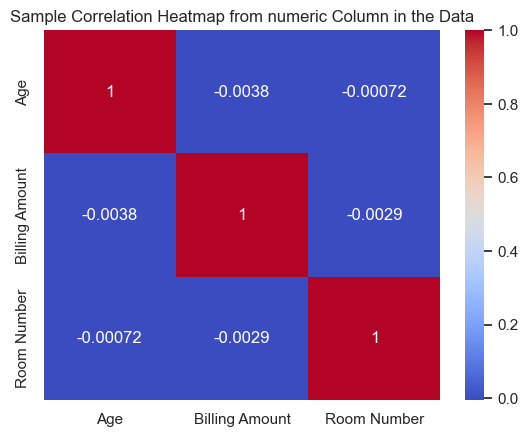

In [16]:
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Sample Correlation Heatmap from numeric Column in the Data")
plt.show()